In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
from sklearn.metrics import r2_score,mean_squared_error
import xgboost as xgb
#from sklearn.externals import joblib

In [6]:
data=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/Salaries.csv")
data.head()

rank discipline  yrs.since.phd  yrs.service   sex  salary
0      Prof          B             19           18  Male  139750
1      Prof          B             20           16  Male  173200
2  AsstProf          B              4            3  Male   79750
3      Prof          B             45           39  Male  115000
4      Prof          B             40           41  Male  141500

In [7]:
data.isna().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

In [8]:
data.shape

(397, 6)

In [9]:
data.describe(include='all')

rank discipline  yrs.since.phd  yrs.service   sex         salary
count    397        397     397.000000   397.000000   397     397.000000
unique     3          2            NaN          NaN     2            NaN
top     Prof          B            NaN          NaN  Male            NaN
freq     266        216            NaN          NaN   358            NaN
mean     NaN        NaN      22.314861    17.614610   NaN  113706.458438
std      NaN        NaN      12.887003    13.006024   NaN   30289.038695
min      NaN        NaN       1.000000     0.000000   NaN   57800.000000
25%      NaN        NaN      12.000000     7.000000   NaN   91000.000000
50%      NaN        NaN      21.000000    16.000000   NaN  107300.000000
75%      NaN        NaN      32.000000    27.000000   NaN  134185.000000
max      NaN        NaN      56.000000    60.000000   NaN  231545.000000

Few columns have very little importance in terms of prediction of salary; let's drop them.

In [6]:
#data=data.drop(['rank','discipline','sex'],axis=1)

In [10]:
data.describe()

yrs.since.phd  yrs.service         salary
count     397.000000   397.000000     397.000000
mean       22.314861    17.614610  113706.458438
std        12.887003    13.006024   30289.038695
min         1.000000     0.000000   57800.000000
25%        12.000000     7.000000   91000.000000
50%        21.000000    16.000000  107300.000000
75%        32.000000    27.000000  134185.000000
max        56.000000    60.000000  231545.000000

In [11]:
data.isna().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

In [12]:
stats.skew(data['yrs.service'])

0.6481088240680348

In [13]:
stats.skew(data['yrs.since.phd'])

0.29974153157458827

(array([82., 87., 37., 74., 38., 31., 28., 12.,  6.,  2.]),
 array([ 0.,  6., 12., 18., 24., 30., 36., 42., 48., 54., 60.]),
 <BarContainer object of 10 artists>)

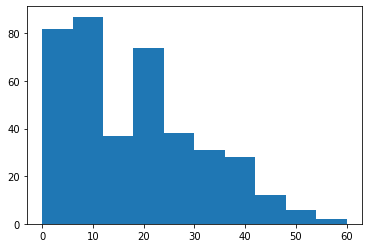

In [14]:
plt.hist(data['yrs.service'])

(array([48., 49., 62., 54., 56., 41., 45., 21., 16.,  5.]),
 array([ 1. ,  6.5, 12. , 17.5, 23. , 28.5, 34. , 39.5, 45. , 50.5, 56. ]),
 <BarContainer object of 10 artists>)

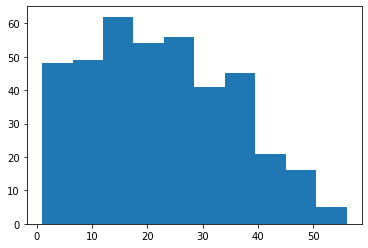

In [15]:
plt.hist(data['yrs.since.phd'])

In [16]:
col_n=data.columns
col_n

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

In [17]:
Col_m=['rank','discipline','yrs.since.phd', 'yrs.service','sex' ,'salary']

In [18]:
for g in Col_m:
    lala=LabelEncoder()
    data[g]=lala.fit_transform(data[g])

In [19]:
data

rank  discipline  yrs.since.phd  yrs.service  sex  salary
0       2           1             18           18    1     289
1       2           1             19           16    1     355
2       1           1              3            3    1      39
3       2           1             44           39    1     209
4       2           1             39           41    1     293
..    ...         ...            ...          ...  ...     ...
392     2           0             32           30    1     140
393     2           0             30           19    1     321
394     2           0             41           25    1     135
395     2           0             24           15    1     103
396     1           0              7            4    1      44

[397 rows x 6 columns]

In [20]:
data.describe()

rank  discipline  yrs.since.phd  yrs.service         sex  \
count  397.000000  397.000000     397.000000   397.000000  397.000000   
mean     1.508816    0.544081      21.289673    17.506297    0.901763   
std      0.757486    0.498682      12.825725    12.735780    0.298010   
min      0.000000    0.000000       0.000000     0.000000    0.000000   
25%      1.000000    0.000000      11.000000     7.000000    1.000000   
50%      2.000000    1.000000      20.000000    16.000000    1.000000   
75%      2.000000    1.000000      31.000000    27.000000    1.000000   
max      2.000000    1.000000      52.000000    51.000000    1.000000   

           salary  
count  397.000000  
mean   178.468514  
std    108.212833  
min      0.000000  
25%     85.000000  
50%    174.000000  
75%    272.000000  
max    370.000000

C:\Users\bipas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


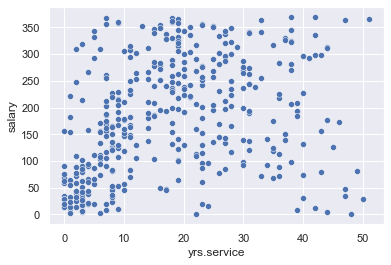

In [21]:
sns.set()
sns.scatterplot(data['yrs.service'],data['salary'])
plt.show()

C:\Users\bipas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


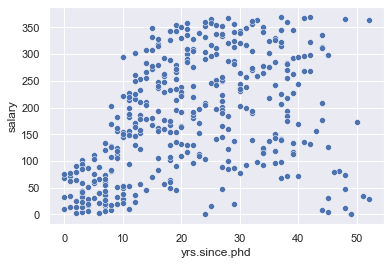

In [22]:
sns.set()
sns.scatterplot(data['yrs.since.phd'],data['salary'])
plt.show()

In [23]:
df=pd.get_dummies(data=data)
df

rank  discipline  yrs.since.phd  yrs.service  sex  salary
0       2           1             18           18    1     289
1       2           1             19           16    1     355
2       1           1              3            3    1      39
3       2           1             44           39    1     209
4       2           1             39           41    1     293
..    ...         ...            ...          ...  ...     ...
392     2           0             32           30    1     140
393     2           0             30           19    1     321
394     2           0             41           25    1     135
395     2           0             24           15    1     103
396     1           0              7            4    1      44

[397 rows x 6 columns]

In [24]:
y=data['salary']
x=data.drop('salary',axis=1)

In [25]:
y.head()

0    289
1    355
2     39
3    209
4    293
Name: salary, dtype: int64

In [26]:
x.head()

rank  discipline  yrs.since.phd  yrs.service  sex
0     2           1             18           18    1
1     2           1             19           16    1
2     1           1              3            3    1
3     2           1             44           39    1
4     2           1             39           41    1

In [27]:
X_train,X_test,y_train,y_test=model_selection.train_test_split(x,y,test_size=0.25)

In [43]:
p_linear_reg=Pipeline([('Scalar',StandardScaler()),('Linear Regression',LinearRegression())])
p_linear_reg.fit(X_train,y_train)
print(r2_score(p_linear_reg.predict(X_test),y_test),mean_squared_error(p_linear_reg.predict(X_test),y_test))

-0.44960988059424967 6615.764491312846


In [41]:
p_rand_f=Pipeline([('Scalar',StandardScaler()),('Random Forest Regression',RandomForestRegressor())])
p_rand_f.fit(X_train,y_train)
r2_score(p_rand_f.predict(X_test),y_test)


0.41879147750042567

In [33]:
import sklearn

import xgboost as xgb
xgb_re=xgb.XGBRegressor()

p_xgboost__f=Pipeline([('Scalar',StandardScaler()),('XGBoost',XGBRegressor())])
p_xgboost.fit(X_train,y_train)
r2_score(p_xgboost.predict(X_test),np.exp(y_test))

NameError: name 'XGBRegressor' is not defined

In [36]:
p_nb=Pipeline([('NB',GaussianNB())])
p_nb.fit(X_train,y_train)
r2_score(p_nb.predict(X_test),y_test)

-0.2515589440947237

In [37]:
linear_pipeline=Pipeline([('Normalization',StandardScaler()),('Decomposition',PCA(n_components=4)),('Linear Regression',LinearRegression())])
linear_pipeline.fit(X_train,y_train)
r2_score(linear_pipeline.predict(X_test),y_test)


-0.5531725944024437

 This are all very very bad models. The reason may be that there is no pattern inherent in the data, the target variable has no correlation with any of the input data.

In [38]:
data.corr()

rank  discipline  yrs.since.phd  yrs.service       sex  \
rank           1.000000   -0.086266       0.526734     0.454607  0.132492   
discipline    -0.086266    1.000000      -0.218166    -0.165946  0.003724   
yrs.since.phd  0.526734   -0.218166       1.000000     0.910380  0.148850   
yrs.service    0.454607   -0.165946       0.910380     1.000000  0.154191   
sex            0.132492    0.003724       0.148850     0.154191  1.000000   
salary         0.566184    0.166957       0.430239     0.354403  0.130714   

                 salary  
rank           0.566184  
discipline     0.166957  
yrs.since.phd  0.430239  
yrs.service    0.354403  
sex            0.130714  
salary         1.000000

One can see that from this correlation 

In [44]:
import joblib

joblib.dump(p_nb,'NBG.pkl')

['NBG.pkl']